In [7]:
#Gradient Descent

In [8]:
#The Idea Behind Gradient Descent

from scratch.linear_algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

#gradient => the vector of partial derivatives

In [9]:
#Estimating the Gradient
from typing import Callable

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x+h) - f(x))/ h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:  #derivative for squared numbers?
    return 2 * x

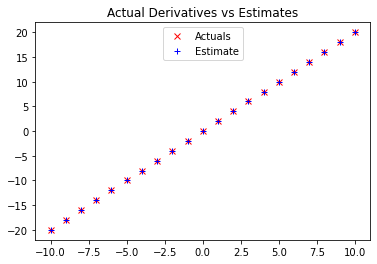

In [10]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

#Plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs Estimates")
plt.plot(xs, actuals, 'rx', label="Actuals")
plt.plot(xs, estimates, 'b+', label="Estimate")
plt.legend(loc=9)
plt.show()

In [11]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i'th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)     #add h to just the i'th element of v
        for j, v_j in enumerate(v)]
        
    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float],
                        v: Vector,
                        h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]


In [15]:
#Using the Gradient

import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves 'step_size' in the 'gradient' direction from v"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

#pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)   #compute the gradient at v
    v = gradient_step(v, grad, -0.01)   #take a negative gradient step
    print(epoch, v)

assert distance(v, [0,0,0]) < 0.001     #v should be close to 0

520749114725e-06]
741 [9.013377755818021e-07, -3.9860093482620947e-07, -1.928103033413243e-06]
742 [8.833110200701661e-07, -3.906289161296853e-07, -1.889540972744978e-06]
743 [8.656447996687628e-07, -3.8281633780709157e-07, -1.8517501532900784e-06]
744 [8.483319036753875e-07, -3.7516001105094974e-07, -1.8147151502242768e-06]
745 [8.313652656018798e-07, -3.6765681082993074e-07, -1.7784208472197912e-06]
746 [8.147379602898422e-07, -3.603036746133321e-07, -1.7428524302753953e-06]
747 [7.984432010840454e-07, -3.5309760112106545e-07, -1.7079953816698873e-06]
748 [7.824743370623645e-07, -3.460356490986441e-07, -1.6738354740364897e-06]
749 [7.668248503211172e-07, -3.3911493611667125e-07, -1.6403587645557598e-06]
750 [7.514883533146949e-07, -3.323326373943378e-07, -1.6075515892646446e-06]
751 [7.36458586248401e-07, -3.256859846464511e-07, -1.5754005574793516e-06]
752 [7.217294145234329e-07, -3.1917226495352206e-07, -1.5438925463297646e-06]
753 [7.072948262329642e-07, -3.1278881965445163e-07, -

In [16]:
#Choosing the Right Step Size

'''
    choosing the right step size is more of an art than a science. Popular options include:
        Using a fixed step size
        Gradually shrinking the step size over time
        At each step, choosing the step size that minimizes the value of the object funtion
    if your step size is too small -> gradient descenet will take forever
    if your step size is too big, your function will get larger or undefined. 
'''

'\n    choosing the right step size is more of an art than a science. Popular options include:\n        Using a fixed step size\n        Gradually shrinking the step size over time\n        At each step, choosing the step size that minimizes the value of the object funtion\n    if your step size is too small -> gradient descenet will take forever\n    if your step size is too big, your function will get larger or undefined. \n'

In [18]:
#Using Gradient Descent to Fit Models

#x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

#Function that determines the gradient based on the error form a single data point
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slop, intercept = theta
    predicted = slop * x + intercept    #The prediction of the model
    error = (predicted - y)             #Error is (predicted - actual)
    square_error = error ** 2           #We'll minimize squared error
    grad = [2 * error * x, 2 * error]   #using its gradient
    return grad

In [21]:
#What we are going to do for a whole dataset
'''
    Start with a random value for theta
    Compute the mean of the gradients
    Adjust theta in that direction
    Repeat
'''

from scratch.linear_algebra import vector_mean

#Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(5000):
    #Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    #Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

9362948608617]
4552 [19.999999618151683, 4.999364222328786]
4553 [19.999999618915155, 4.999365493502281]
4554 [19.999999619677094, 4.9993667621341915]
4555 [19.999999620437514, 4.9993680282296005]
4556 [19.99999962119641, 4.999369291793578]
4557 [19.99999962195379, 4.999370552831188]
4558 [19.99999962270965, 4.999371811347479]
4559 [19.99999962346401, 4.999373067347494]
4560 [19.99999962421685, 4.999374320836263]
4561 [19.999999624968197, 4.999375571818807]
4562 [19.999999625718033, 4.999376820300138]
4563 [19.999999626466373, 4.999378066285256]
4564 [19.999999627213214, 4.999379309779152]
4565 [19.999999627958566, 4.999380550786807]
4566 [19.999999628702422, 4.999381789313191]
4567 [19.999999629444797, 4.999383025363267]
4568 [19.999999630185684, 4.999384258941985]
4569 [19.999999630925092, 4.999385490054287]
4570 [19.999999631663016, 4.999386718705104]
4571 [19.999999632399472, 4.999387944899357]
4572 [19.99999963313445, 4.999389168641957]
4573 [19.999999633867965, 4.999390389937807]

In [24]:
#Minibatch and Stochastic Gradient Descent

from typing import TypeVar, List, Iterator

T = TypeVar('T') #this allows us to type "generic" functions

def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    """Generates 'batch_size' - sized minibatches from the database"""
    #Start indexes 0, batch_size, 2* batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)    #shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

20552394]
542 [19.999997218793908, 4.997497120163997]
543 [19.99988215155103, 4.99750657966397]
544 [20.000109705384837, 4.997510259282214]
545 [19.99990345884226, 4.997622687156684]
546 [19.999967207270497, 4.997624362192281]
547 [19.999886431809824, 4.997634678469052]
548 [19.999621638297985, 4.997693520667539]
549 [20.000128862521297, 4.9977083681061885]
550 [20.00017173720911, 4.997723882121463]
551 [19.99897479069825, 4.997780915322649]
552 [19.9999927579777, 4.9980119063086805]
553 [19.99980076186921, 4.998030726616117]
554 [19.9999077208568, 4.998160911118913]
555 [20.00001136923152, 4.998172572130913]
556 [20.000064418634043, 4.998227046813637]
557 [19.99993165529036, 4.998249474418973]
558 [19.999936368496947, 4.9982596900035965]
559 [19.999918072980343, 4.998338600584148]
560 [20.000074040183804, 4.998341017799015]
561 [20.00005131829956, 4.998350074998259]
562 [19.999836617217355, 4.998367777605354]
563 [19.999923857311472, 4.998479114225471]
564 [20.000280131473517, 4.99849

In [25]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

83956369]
542 [20.000010035060782, 4.999054598312559]
543 [20.00002708573967, 4.999061769586285]
544 [20.00015312107126, 4.99908170321455]
545 [20.000016111381747, 4.999085513487458]
546 [20.000065047803172, 4.999088204659489]
547 [19.999951447560818, 4.9990915925963995]
548 [19.999791531616744, 4.999100516078871]
549 [20.000017416851936, 4.999150741962817]
550 [20.000024695687635, 4.999156569585552]
551 [19.9999663216671, 4.999194683321057]
552 [19.999965209691478, 4.999229978456646]
553 [20.00002239170753, 4.999235292300522]
554 [20.000028193256924, 4.99926546419411]
555 [19.99997303983276, 4.9992730430756565]
556 [20.00001122841257, 4.999277807791082]
557 [19.999970388146018, 4.9993104646970945]
558 [19.99997441716705, 4.999314117808329]
559 [19.9999995094134, 4.999344076213279]
560 [19.999934415757757, 4.99935034954395]
561 [20.0000166502374, 4.999338343810419]
562 [20.000032050409274, 4.999341498150081]
563 [19.99972120772201, 4.999358134581462]
564 [20.000024087072603, 4.99936432